In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'kermany2018:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17839%2F23942%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240422%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240422T173013Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0897dcc0b7fdba24ac487e8dbcd77c54eeb6f61820f39869ef57be6bca4cbe131d5eb4682f53ad5b5222a6b7576f67eba8a3d1f8ac5bfdab8254fda8995aee73996f9f850731208c4e6bc56439e99bc75afe408be5c8321fe099e8530ed1766617b7010b34db0f7ea5f163b3a2d74b78f69262922dc65bcda1cf276a837135b827813fb12843d90f4f9f700bcd1f55024694b4cefd3158c48fb4ce5202632a5c26ddc18ba5fc75fb2a2fb64f25720e88f55a08c13c234e37e04cbc3bdf695137d4bf1c456b23e52e6d1b616b5c7b716dfe34938981101b74588c8b511aa8cd60892900edad878a6d89cefc3691c277b40bf078edd61330a02f78d0c478107669'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 11644282751 bytes downloaded
Downloaded and uncompressed: kermany2018
Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow import keras

In [3]:
import matplotlib.pyplot as plotter_lib

import numpy as np

import PIL as image_lib

import tensorflow as tflow

from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

import glob

In [4]:
def load_data(dataset_path,height,width,batch_size):
    train_dir = os.path.join(dataset_path,'train')
    test_dir = os.path.join(dataset_path,'test')
    val_dir = os.path.join(dataset_path,'val')

    train_ds = keras.utils.image_dataset_from_directory(
        train_dir,
        image_size=(img_height, img_width),
        label_mode='categorical',
        batch_size=batch_size)

    val_ds = tflow.keras.preprocessing.image_dataset_from_directory(
        val_dir,
        label_mode='categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size)

    test_ds = keras.utils.image_dataset_from_directory(
        test_dir,
        label_mode='categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size)

    return train_ds ,test_ds ,val_ds

In [5]:
batch_size = 32
img_height = 256
img_width = 256
dataset_path = '/kaggle/input/kermany2018/OCT2017 /'
train_ds ,test_ds ,val_ds= load_data(dataset_path,img_height,img_width,batch_size)

Found 83484 files belonging to 4 classes.
Found 32 files belonging to 4 classes.
Found 968 files belonging to 4 classes.


In [6]:
class_names = train_ds.class_names
n_classes = 4
class_names

['CNV', 'DME', 'DRUSEN', 'NORMAL']

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 4)


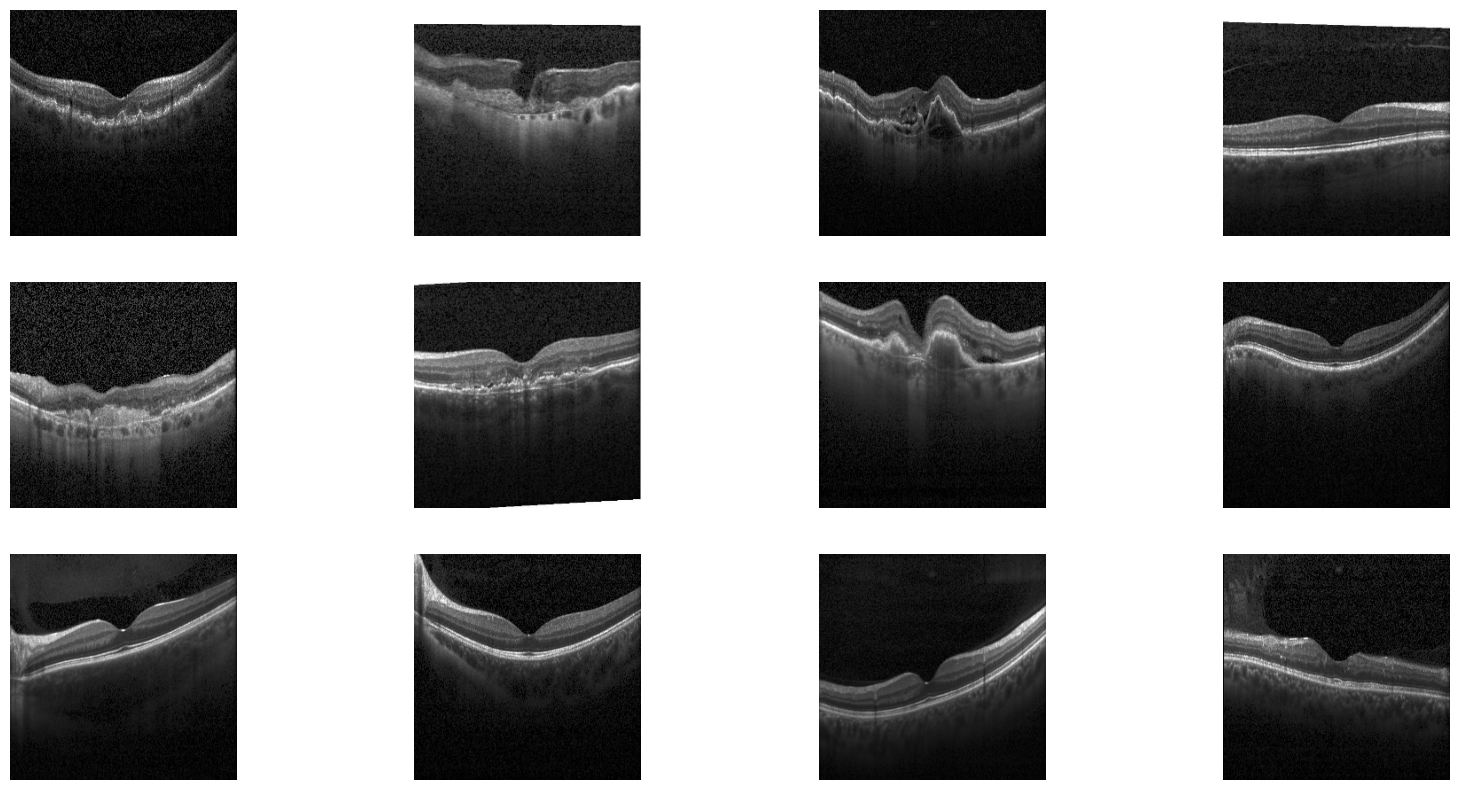

In [8]:
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,img_width,3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)
  ]
)

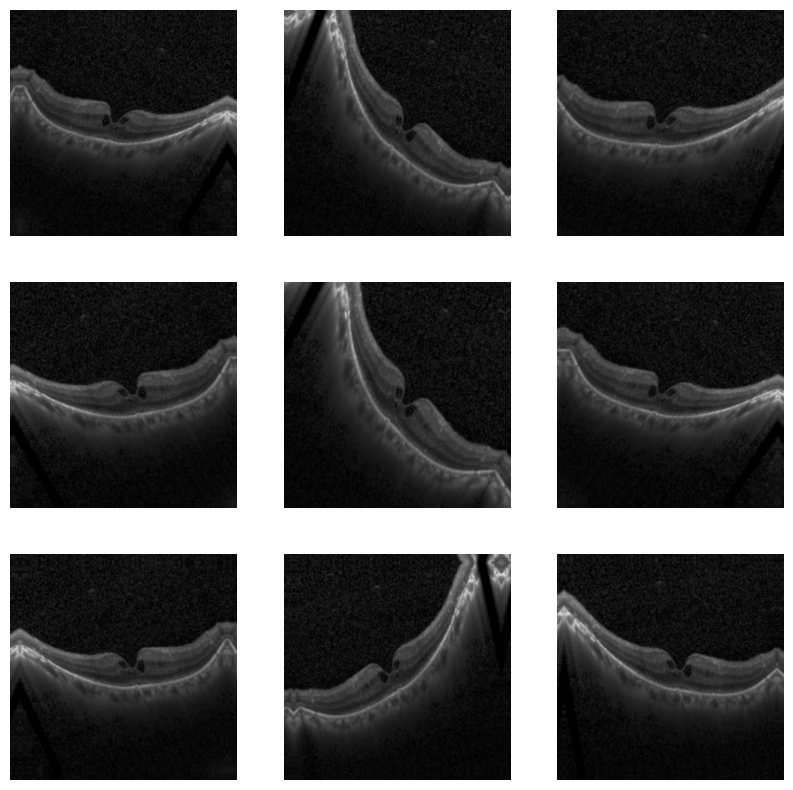

In [10]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from tensorflow.keras.metrics import Recall, Precision, Accuracy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define your InceptionV3 model
def create_inceptionv3_model(input_shape=(256, 256, 3), num_classes=4):
    model = Sequential()

    # Stem
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (1, 1), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (1, 1), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Inception blocks
    for _ in range(2):
        model.add(inception_block(model.layers[-1].output, (64, 96, 128, 16, 32)))  # Pass the output of the last layer

    model.add(MaxPooling2D((2, 2)))


    model.add(Flatten())


    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))


    model.add(Dense(num_classes, activation='softmax'))

    return model

def inception_block(prev_layer, filters):
    branch1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(prev_layer)

    branch3x3 = Conv2D(filters[1], (1, 1), padding='same', activation='relu')(prev_layer)
    branch3x3 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(prev_layer)
    branch5x5 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(prev_layer)
    branch_pool = Conv2D(filters[5], (1, 1), padding='same', activation='relu')(branch_pool)

    concat = tf.keras.layers.concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return concat

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from tensorflow.keras.metrics import Recall, Precision, Accuracy

# Define your model
custom_model = Sequential()

# Add data augmentation and rescaling layers if needed
# custom_model.add(data_augmentation)
# custom_model.add(Rescaling(1./255))

# Add convolutional layers
custom_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
custom_model.add(MaxPooling2D((2, 2)))
custom_model.add(Conv2D(64, (3, 3), activation='relu'))
custom_model.add(MaxPooling2D((2, 2)))
custom_model.add(Conv2D(128, (3, 3), activation='relu'))
custom_model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
custom_model.add(Flatten())

# Add fully connected layers
custom_model.add(Dense(512, activation='relu'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(4, activation='softmax'))  # Assuming 8 classes for classification

# Define epochs and callbacks
epochs = 10


# Define metrics
metrics = ['accuracy', Recall(), Precision()]

# Compile the model
custom_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

# Train the model
history = custom_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
2609/2609 [==============================] - 305s 113ms/step - loss: 1.1094 - accuracy: 0.7430 - recall: 0.6555 - precision: 0.8167 - val_loss: 0.6378 - val_accuracy: 0.7188 - val_recall: 0.6562 - val_precision: 0.7500
Epoch 2/10
2609/2609 [==============================] - 290s 111ms/step - loss: 0.3892 - accuracy: 0.8624 - recall: 0.8362 - precision: 0.8860 - val_loss: 0.3582 - val_accuracy: 0.8438 - val_recall: 0.8125 - val_precision: 0.8667
Epoch 3/10
2609/2609 [==============================] - 288s 110ms/step - loss: 0.2644 - accuracy: 0.9075 - recall: 0.8951 - precision: 0.9192 - val_loss: 0.2178 - val_accuracy: 0.9375 - val_recall: 0.9375 - val_precision: 0.9375
Epoch 4/10
2609/2609 [==============================] - 293s 112ms/step - loss: 0.1813 - accuracy: 0.9377 - recall: 0.9310 - precision: 0.9437 - val_loss: 0.2527 - val_accuracy: 0.9062 - val_recall: 0.9062 - val_precision: 0.9062
Epoch 5/10
2609/2609 [==============================] - 286s 109ms/step - loss: 

In [14]:
history.history['accuracy']

[0.7430285811424255,
 0.8624047636985779,
 0.9074912667274475,
 0.937700629234314,
 0.9551531076431274,
 0.9665923714637756,
 0.9749413132667542,
 0.9796727299690247,
 0.9827751517295837,
 0.9849072694778442]

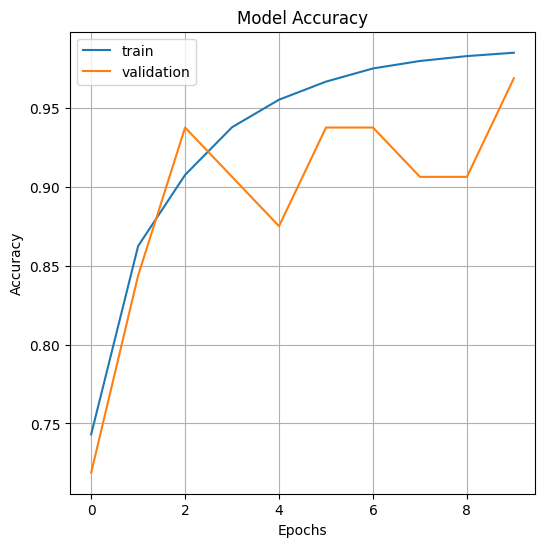

In [15]:
plotter_lib.figure(figsize=(6, 6))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plotter_lib.grid()

plotter_lib.title('Model Accuracy')

plotter_lib.ylabel('Accuracy')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [16]:
plotter_lib.show()

plotter_lib.savefig('output-plot.png')

<Figure size 640x480 with 0 Axes>

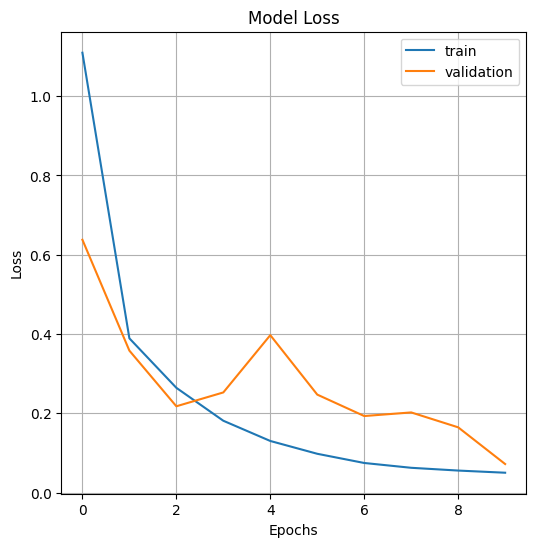

In [17]:
plotter_lib.figure(figsize=(6, 6))

epochs_range= range(epochs)

plotter_lib.plot( epochs_range, history.history['loss'], label="Training Loss")

plotter_lib.plot(epochs_range, history.history['val_loss'], label="Validation Loss")

plotter_lib.grid()

plotter_lib.title('Model Loss')

plotter_lib.ylabel('Loss')

plotter_lib.xlabel('Epochs')

plotter_lib.legend(['train', 'validation'])

In [18]:
plotter_lib.show()

plotter_lib.savefig('output-plot2.png')

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 1s 668ms/step
Confusion Matrix:
[[242   0   0   0]
 [ 17 208   3  14]
 [  0   0 242   0]
 [  0   0   2 240]]

Classification Report:
              precision    recall  f1-score   support

         CNV       0.93      1.00      0.97       242
         DME       1.00      0.86      0.92       242
      DRUSEN       0.98      1.00      0.99       242
      NORMAL       0.94      0.99      0.97       242

    accuracy                           0.96       968
   macro avg       0.96      0.96      0.96       968
weighted avg       0.96      0.96      0.96       968



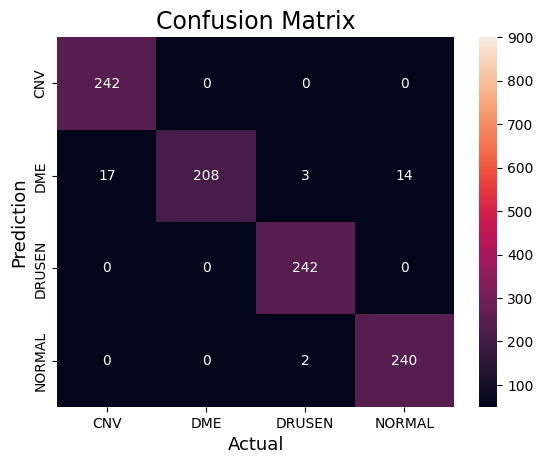

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

true_labels = []
predicted_labels = []
class_names = train_ds.class_names
for batch in test_ds:
    images, labels = batch

    # Make predictions on the batch
    predictions = custom_model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    true_labels.extend(np.argmax(labels, axis=1))  # Convert one-hot encoded labels to class indices
    predicted_labels.extend(predicted_classes)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(classification_rep)

# Plot the confusion matrix.
sns.heatmap(confusion_mtx,
            annot=True,
            fmt='g',
            vmin=50, vmax=900,
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

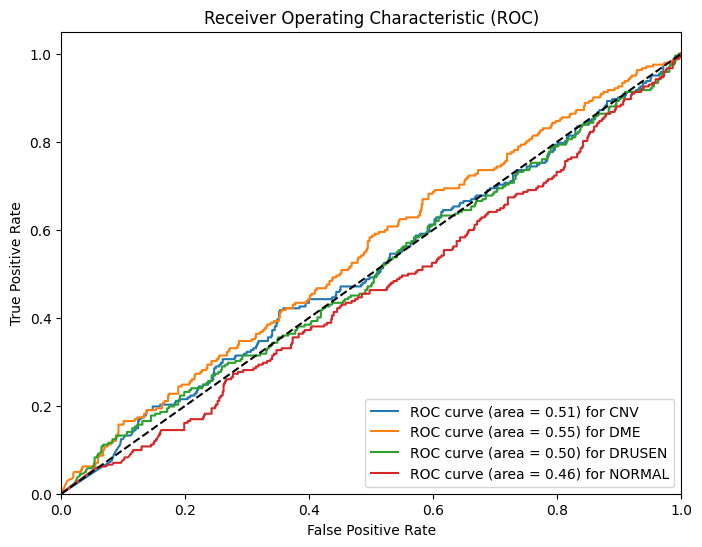

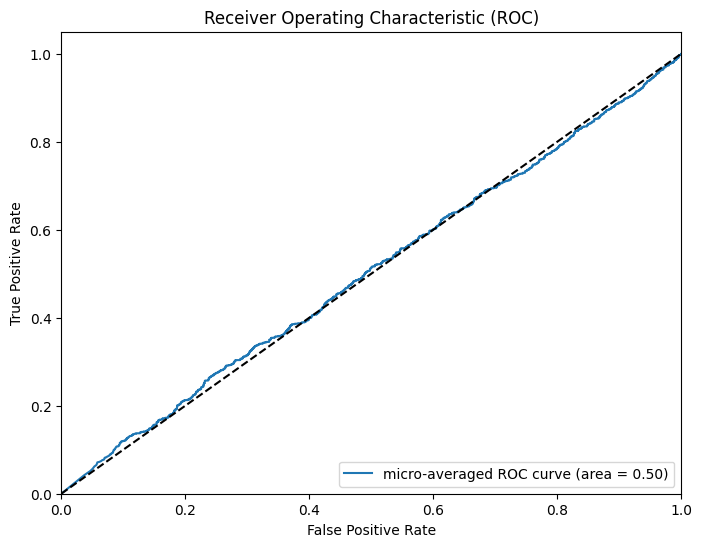

In [21]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
label_binarizer.fit(true_labels)
true_labels_one_hot = label_binarizer.transform(true_labels)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_one_hot[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

fpr_micro, tpr_micro, _ = roc_curve(true_labels_one_hot.ravel(), predicted_probabilities.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label=f'micro-averaged ROC curve (area = {roc_auc_micro:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()